# Objective: Assess understanding of weight initialization techniques in artificial neural networks. Evaluate the impact of different initialization methods on model performance. Enhance knowledge of weight initialization's role in improving convergence and avoiding vanishing/exploding gradients.



## Part 1: Upderstanding Weight Initialization

### 1. Explain the importance of weight initialization in artificial neural networks. Why is it necessary to initialize the weights carefully?
Ans. Weight initialization is crucial in artificial neural networks because the initial values of the weights significantly impact the convergence and performance of the model during training. Initializing weights carefully is necessary to set a proper starting point for the optimization process. If the weights are initialized too large or too small, it can lead to various issues during training, such as vanishing gradients or exploding gradients. Proper initialization helps the model converge faster and more reliably, leading to better generalization on unseen data.

### 2. Describe the challenges associated with improper weight initialization. How do these issues affect model training and convergence?
Ans. Improper weight initialization can lead to several issues:

Vanishing Gradients: When weights are initialized too small, during backpropagation, gradients can become extremely small as they pass through the layers. As a result, the model learns very slowly, leading to a prolonged training process or getting stuck in local minima.

Exploding Gradients: On the other hand, if weights are initialized too large, gradients can become extremely large, causing the model to diverge during training.

Saturation: Improper initialization can cause neurons to saturate, where they get stuck in the flat regions of activation functions. This results in very low or no gradients, preventing effective learning.

Slow Convergence: Inappropriate initialization can lead to slow convergence, increasing the time required to train the model and making it harder to find optimal solutions.

### 3. Discuss the concept of variance and how it relates to weight initialization. Why is it crucial to consider the variance of weights during initialization?
Ans. In weight initialization, variance refers to the spread or dispersion of initial weight values. When initializing weights, it is essential to control the variance to prevent the issues mentioned above.

    High variance (large initial weights): Can lead to exploding gradients and divergent training.
    Low variance (small initial weights): Can cause vanishing gradients and slow convergence.

Balancing the variance is crucial for effectively training neural networks. The goal is to set the variance such that the signals during forward and backward passes neither die out (vanish) nor blow up (explode).

## Part 2: Weight Initialization Technique

### 4. Explain the concept of zero initialization. Discuss its potential limitations and when it can be appropriate to use.
Ans. Zero initialization involves setting all weights in the neural network to zero. However, this method is not ideal because it causes all neurons in a layer to compute the same output during forward propagation and have the same gradients during backpropagation. Consequently, the weights will remain symmetric and never break the symmetry, leading to ineffective learning and poor model performance.

### 5. Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradients?
Ans. Random initialization involves setting the weights to random values, typically drawn from a distribution like the uniform or normal distribution. By introducing randomness, the symmetry problem of zero initialization is mitigated. However, this method can still suffer from the vanishing or exploding gradient problem if the initial weights have high variance.

To mitigate potential issues:

    The scale of random initialization can be controlled by dividing the randomly initialized weights by the square root of the number of neurons in the previous layer (Xavier/Glorot initialization) or by the number of neurons in the current layer (He initialization).
    Using activation functions that have nonzero gradients for a wide range of inputs, such as ReLU, can help with the vanishing gradient problem.

### 6. Discuss the concept of Xavier/Glorot initialization. Explain how it addresses the challenges of improper weight initialization and the underlying theory behind it.
Ans. Xavier/Glorot initialization sets the initial weights using a Gaussian or uniform distribution with a variance that depends on the number of input and output neurons in the layer. For a layer with n inputs and m outputs, the weights are initialized with variance 2 / (n + m). This technique balances the variance, making it suitable for sigmoid and hyperbolic tangent (tanh) activation functions.

### 7. Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred?
Ans. He initialization is a variation of Xavier initialization but is tailored for ReLU (and its variants) activation functions. For a layer with n inputs, the weights are initialized with variance 2 / n. It allows higher variance in the weights, which is beneficial for ReLU activations as they can suffer from the dying ReLU problem when initialized with low variances.


## Part 3: Applying Weight Initialization

### 8. Implement different weight initialization techniques (zero initialization, random initialization, Xavier initialization, and He initialization) in a neural network using a framework of your choice. Train the model on a suitable dataset and compare the performance of the initialized models.

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# One-hot encode the target labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [26]:
# Define the neural network architecture
def create_model(initializer):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', kernel_initializer=initializer, input_shape=(4,)),
        tf.keras.layers.Dense(16, activation='relu', kernel_initializer=initializer),
        tf.keras.layers.Dense(3, activation='softmax', kernel_initializer=initializer)
    ])
    return model

# Train and evaluate models with different initializers
def train_and_evaluate_model(initializer):
    model = create_model(initializer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    _, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, test_accuracy

In [27]:
# Define the weight initialization techniques
zero_initializer = tf.keras.initializers.Zeros()
random_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.1)
xavier_initializer = tf.keras.initializers.GlorotNormal()
he_initializer = tf.keras.initializers.HeNormal()

# Evaluate models using different initializers
accuracy_zero = train_and_evaluate_model(zero_initializer)
accuracy_random = train_and_evaluate_model(random_initializer)
accuracy_xavier = train_and_evaluate_model(xavier_initializer)
accuracy_he = train_and_evaluate_model(he_initializer)

In [32]:
# Compare the performance of initialized models
print("Accuracy using Zero Initialization:", accuracy_zero[1])
print("Accuracy using Random Initialization:", accuracy_random[1])
print("Accuracy using Xavier Initialization:", accuracy_xavier[1])
print("Accuracy using He Initialization:", accuracy_he[1])

Accuracy using Zero Initialization: 0.30000001192092896
Accuracy using Random Initialization: 0.9333333373069763
Accuracy using Xavier Initialization: 1.0
Accuracy using He Initialization: 0.8999999761581421


C:\anacoda\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
C:\anacoda\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
C:\anacoda\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is uns

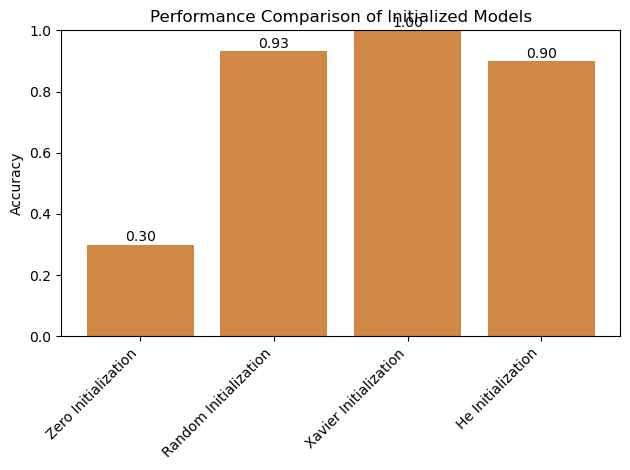

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

# Evaluate models using different initializers and store their histories
histories = []
accuracies = []

for initializer in [zero_initializer, random_initializer, xavier_initializer, he_initializer]:
    history, accuracy = train_and_evaluate_model(initializer)
    histories.append(history)
    accuracies.append(accuracy)

# Visualize the performance of the initialized models
labels = ['Zero Initialization', 'Random Initialization', 'Xavier Initialization', 'He Initialization']
x_pos = np.arange(len(labels))

plt.bar(x_pos, accuracies, align='center', alpha=0.7)
plt.xticks(x_pos, labels, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Initialized Models')
plt.ylim([0, 1.0])
# Evaluate models using different initializers and store their histories
histories = []
accuracies = []

for initializer in [zero_initializer, random_initializer, xavier_initializer, he_initializer]:
    history, accuracy = train_and_evaluate_model(initializer)
    histories.append(history)
    accuracies.append(accuracy)

# Visualize the performance of the initialized models
labels = ['Zero Initialization', 'Random Initialization', 'Xavier Initialization', 'He Initialization']
x_pos = np.arange(len(labels))

plt.bar(x_pos, accuracies, align='center', alpha=0.7)
plt.xticks(x_pos, labels, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Initialized Models')
plt.ylim([0, 1.0])

# Annotate the bars with the accuracy values
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

### 9. Discuss the considerations and tradeoffs when choosing the appropriate weight initialization technique for a given neural network architecture and task.
Ans. When choosing a weight initialization technique, consider the following:

    The choice of activation function: Different initialization techniques are suitable for different activation functions (e.g., Xavier for sigmoid/tanh, He for ReLU).
    Network architecture: The number of layers, the number of neurons in each layer, and the depth of the network can influence the choice of initialization technique.
    Data distribution: The scale of the data can also affect the performance of different initialization methods.
    Computational cost: Some initialization techniques may require more computation during training.

It's essential to experiment with different initialization methods and monitor the training process to choose the one that leads to faster convergence and better model performance for the specific task and architecture.